<a href="https://colab.research.google.com/github/PiotMik/NumericalMethodsForSDEs/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
sns.set()
sns.set_context('talk')
plt.rcParams['figure.figsize'] = (10, 5)

# Wiener process simulation

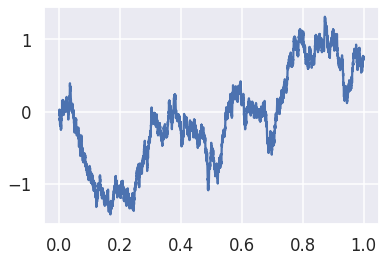

In [36]:
def generate_wiener_process_v1(T:float, N:int, mu: float, sigma: float):
  """
  Generate 1D Wiener Process by:
    1) Discretizing the time axis
    2) Simulating an increment over that interval
  Parameters
  --------
  T: float
    Time horizon for the simulation
  N: int
    Number of discretization steps
  mu: float
    Wiener process drift term
  sigma: float
    Wiener process diffusion term
  Returns
  --------
  xs, ys
    Points on the time axis, and appropriate process values
  """
  t = np.linspace(0.0, T, N)
  dt = t[1] - t[0]
  rnorm = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt), size = len(t))

  xs = t
  ys = rnorm.cumsum()
  return xs, ys

x, y = generate_wiener_process_v1(T = 1, N = 10000,
                                  mu = 0.5, sigma = 2.0)
_ = plt.plot(x, y)

In [43]:
dt = x[1] - x[0]
diffs = pd.DataFrame(y).diff()
print(f"Expected std: {2.0*np.sqrt(dt):.4f}. Got: {diffs.std()}")
print(f"Expected mu: {0.5*dt:.6f}. Got: {diffs.mean()}")


Expected std: 0.0200. Got: 0    0.020009
dtype: float64
Expected mu: 0.000050. Got: 0    0.000076
dtype: float64


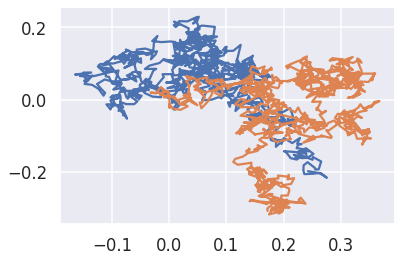

In [47]:
def generate_wiener_process_v2(T:float, N:int, mu: float, sigma: float):
  """
  Generate 2D Wiener Process by:
    1) Discretizing the time axis
    2) Simulating an increment over that interval
  Parameters
  --------
  T: float
    Time horizon for the simulation
  N: int
    Number of discretization steps
  mu: float
    Wiener process drift term
  sigma: float
    Wiener process diffusion term
  Returns
  --------
  xs, (ys
    Points on the time axis, and appropriate process values
  """
  t = np.linspace(0.0, T, N)
  dt = t[1] - t[0]
  rnorm1 = np.random.normal(loc = mu*dt, scale = sigma*dt, size = len(t))
  rnorm2 = np.random.normal(loc = mu*dt, scale = sigma*dt, size = len(t))
  

  xs = t
  ys1 = rnorm1.cumsum()
  ys2 = rnorm2.cumsum()
  
  return xs, (ys1, ys2)

x, y = generate_wiener_process_v2(T = 10, N = 1000,
                                  mu = 0.0, sigma = 1.0)
_ = plt.plot(y[0], y[1])
x, y = generate_wiener_process_v2(T = 10, N = 1000,
                                  mu = 0.0, sigma = 1.0)
_ = plt.plot(y[0], y[1])

In [58]:
def generate_wiener_process_v3(T:float, N:int, mu: float, sigma: float):
  """
  Generate 3D Wiener Process by:
    1) Discretizing the time axis
    2) Simulating an increment over that interval
  Parameters
  --------
  T: float
    Time horizon for the simulation
  N: int
    Number of discretization steps
  mu: float
    Wiener process drift term
  sigma: float
    Wiener process diffusion term
  Returns
  --------
  xs, (ys
    Points on the time axis, and appropriate process values
  """
  t = np.linspace(0.0, T, N)
  dt = t[1] - t[0]
  rnorm1 = np.random.normal(loc = mu*dt, scale = sigma*dt, size = len(t))
  rnorm2 = np.random.normal(loc = mu*dt, scale = sigma*dt, size = len(t))
  rnorm3 = np.random.normal(loc = mu*dt, scale = sigma*dt, size = len(t))
  
  xs = t
  ys1 = rnorm1.cumsum()
  ys2 = rnorm2.cumsum()
  ys3 = rnorm3.cumsum()
  
  return xs, (ys1, ys2, ys3)

_, (y1, y2, y3)= generate_wiener_process_v3(T = 10, N = 1000,
                                            mu = 0.0, sigma = 1.0)

df = pd.DataFrame.from_dict({'x': y1,
                             'y': y2,
                             'z': y3})
fig = px.line_3d(df, x='x', y='y', z='z')
fig.show()
